In [1]:
from utils import *
df = get_dataframe(True)

/home/hussein/miniconda3/envs/hussein2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df['model'].value_counts()

nomodel                 39
chat_gpt35              35
autocomplete_gpt35      32
chat_gpt4               30
autocomplete_llama34    28
chat_llama7             28
autocomplete_llama7     26
chat_llama34            25
Name: model, dtype: int64

Explanation of the different columns in df:

model: condition identifier

model_name: model identifier

task_id: task set identifier

interface: interface identifier autocomplete, chat or nomodel

aihelpful: how helpful the AI was (rating int)

mean_task_duration: mean time taken to complete a task

n_tasks_completed: number of tasks completed

sugg_accept_rate: average suggestion acceptance rate

n_sugg_requested: number of suggestions requested

sugg_accept_rate_requested: suggestion acceptance rate for requested suggestions

sugg_accept_rate_non_requested: suggestion acceptance rate for non-requested suggestions

n_assistant_response: number of chatbot messages

n_copy_code_button: times the copy code button was clicked

n_copy_from_chat: times code was copied from chat of AI

avg_copy_per_response: average number of times code was copied per chatbot message

prog_experience: programming experience from google form

python_experience: python experience from google form

ai_experience: AI experience from google form

task_data: for all tasks attempted, the final code that was submitted, whether the task was 
completed, and the time taken to complete the task, and if skipped

code_history: for all tasks attempted, the code history of the task

In [3]:
plt.rcParams.update({'font.size': 20})

# Section 4

Visualizing results from two papers: *Code llama: Open foundation models for code* and *Is your code generated by chatgpt really correct? rigorous evaluation of large language models for code generation*.

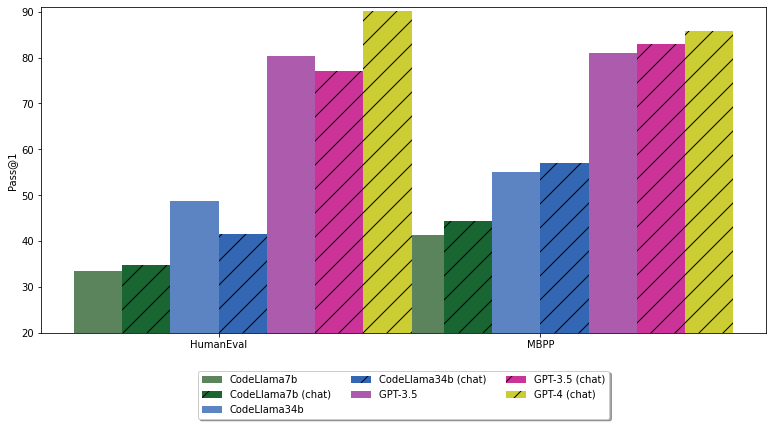

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 20})

plt.figure(figsize=(13,6))


color1 = (0.2,0.4,0.2,0.8) 
color2 = (0.1,0.4,0.2,1) 
color3 = (0.2,0.4,0.7,0.8) 
color4 = (0.2,0.4,0.7,1) 
color5 = (0.6,0.2,0.6,0.8) 
color6 = (0.8,0.2,0.6,1) 
color7 = (0.8,0.8,0.2,1)
colors = [color1, color2, color3, color4, color5, color6, color7]



species = ("HumanEval", "MBPP")
penguin_means = {
    'CodeLlama7b': (33.5, 41.4),
    'CodeLlama7b (chat)': (34.8, 44.4),
    'CodeLlama34b': (48.8, 55.0),
    'CodeLlama34b (chat)': (41.5, 57.0),
    'GPT-3.5 ': (80.34, 81.03),
    'GPT-3.5 (chat)': (77.0, 82.91),
    'GPT-4 (chat)': (90.2, 85.7),
}


x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0


for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    hatch_pattern = '/' if 'chat' in attribute else ''  # Apply hatch pattern if 'chat' is in the label
    rects = plt.bar(x + offset, measurement, width, label=attribute, color=colors[multiplier], hatch=hatch_pattern)
    multiplier += 1


# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Pass@1')
plt.xticks(x + 2.5*width, species)
# plt.legend(loc='bottom', ncols=3)
plt.ylim(20, 91)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)

# Section 5 stats

In [5]:
print(f'number of participants {len(df)}')

print("Percentage of participants by condition:", df['model'].value_counts(normalize=True) * 100)
print("Count of participants by condition:", df['model'].value_counts())
print('Total number of tasks completed', sum(df['n_tasks_completed']))
print("Summary statistics for the number of tasks completed:",df['n_tasks_completed'].describe())

print('total number of suggestions shown',  sum(df['n_sugg_shown']))
print('total number of suggestions accepted', sum(df['n_sugg_accepted']) )
print('percentage of suggestions accepted', sum(df['n_sugg_accepted']) / sum(df['n_sugg_shown']))


print('total number of assistant responses', sum(df['n_assistant_response']))
print('total number of copied messages from responses', sum(df['n_copy_from_chat']))
df['copied_per_response'] = np.where(df['avg_copy_per_response'] > 0, 1, 0)
print('average copy rate from chat response', np.nanmean(df['copied_per_response']))


number of participants 243
Percentage of participants by condition: nomodel                 16.049383
chat_gpt35              14.403292
autocomplete_gpt35      13.168724
chat_gpt4               12.345679
autocomplete_llama34    11.522634
chat_llama7             11.522634
autocomplete_llama7     10.699588
chat_llama34            10.288066
Name: model, dtype: float64
Count of participants by condition: nomodel                 39
chat_gpt35              35
autocomplete_gpt35      32
chat_gpt4               30
autocomplete_llama34    28
chat_llama7             28
autocomplete_llama7     26
chat_llama34            25
Name: model, dtype: int64
Total number of tasks completed 888
Summary statistics for the number of tasks completed: count    243.000000
mean       3.654321
std        1.706772
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        8.000000
Name: n_tasks_completed, dtype: float64
total number of suggestions shown 5204
total number of suggestio

# Section 5.1


### Task duration and tasks completed bar plot

In [6]:
# ignore nans
mean_duration_by_model = df.groupby('model_name')['mean_task_duration'].mean()
stderr_duration_by_model = df.groupby('model_name')['mean_task_duration'].sem()
task_duration_values_by_model = df.groupby('model_name')['mean_task_duration'].apply(list)


task_completion_time_df = pd.DataFrame({
    'mean': mean_duration_by_model,
    'se': stderr_duration_by_model,
    'values': task_duration_values_by_model
})


mean_duration_by_model = df.groupby('model_name')['n_tasks_completed'].mean()
stderr_duration_by_model = df.groupby('model_name')['n_tasks_completed'].sem()
tasks_completed_values_by_model = df.groupby('model_name')['n_tasks_completed'].apply(list)

tasks_completed_df = pd.DataFrame({
    'mean': mean_duration_by_model,
    'se': stderr_duration_by_model,
    'values': tasks_completed_values_by_model
})

task_completion_time_df = task_completion_time_df.reindex(['No LLM', 'CodeLlama7b', 'CodeLlama7b (chat)', 'CodeLlama34b', 'CodeLlama34b (chat)', 'GPT-3.5', 'GPT-3.5 (chat)','GPT-4o (chat)'])
tasks_completed_df = tasks_completed_df.reindex(['No LLM', 'CodeLlama7b', 'CodeLlama7b (chat)', 'CodeLlama34b', 'CodeLlama34b (chat)', 'GPT-3.5', 'GPT-3.5 (chat)', 'GPT-4o (chat)'])

In [7]:
task_completion_time_df

,mean,se,values
model_name,,,
No LLM,399.962763,29.864280,"[463.63, 279.7722857142857, 183.519, 314.38599..."
CodeLlama7b,370.673709,28.104393,"[473.90425000000005, 592.8086666666667, 396.54..."
CodeLlama7b (chat),447.111375,42.489529,"[237.53633333333332, 465.4053333333333, 1020.3..."
CodeLlama34b,324.448315,15.882835,"[353.75640000000004, 271.82233333333335, 246.8..."
CodeLlama34b (chat),344.900835,26.395718,"[339.39575, 412.0625, 240.27766666666665, 292...."
GPT-3.5,328.039927,20.530284,"[239.7527142857143, 399.0105, 236.22425, 343.0..."
GPT-3.5 (chat),316.349329,20.833669,"[329.03766666666667, 324.5643333333333, 734.03..."
GPT-4o (chat),339.901481,27.761119,"[509.3395, 193.982, 271.82114285714283, 359.17..."


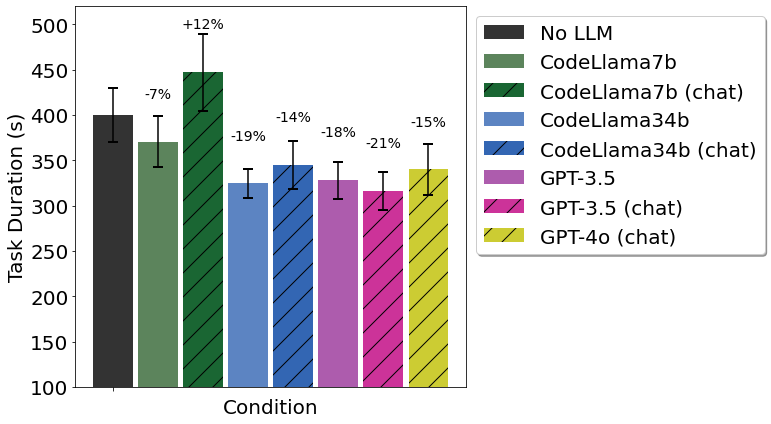

In [8]:
import scipy.stats as stats
plt.rcParams.update({'font.size': 20})

plt.figure(figsize=(7,7))

color0 = (0,0,0,0.8)
color1 = (0.2,0.4,0.2,0.8) 
color2 = (0.1,0.4,0.2,1) 
color3 = (0.2,0.4,0.7,0.8) 
color4 = (0.2,0.4,0.7,1) 
color5 = (0.6,0.2,0.6,0.8) 
color6 = (0.8,0.2,0.6,1) 
# yellow
color7 = (0.8,0.8,0.2,1)
colors = [color0, color1, color2, color3, color4, color5, color6, color7]

x = 0 # the label locations
width = 0.17  # the width of the bars
multiplier = 0


for i in range(len(task_completion_time_df)):
    offset = width * multiplier  
    name = task_completion_time_df.iloc[i].name
    hatch_pattern = '/' if 'chat' in name else ''  # Apply hatch pattern if 'chat' is in the label
    measurement = task_completion_time_df.iloc[i]['mean']
    stderr = task_completion_time_df.iloc[i]['se']
    rects = plt.bar(x + offset , measurement, width - 0.02, label=name, color=colors[multiplier],hatch=hatch_pattern)
    # add stderr
    plt.errorbar(x + offset , measurement, stderr, fmt='none', ecolor='black', capsize=5, capthick=2)
    # get percentage improvement in measurement over No LLM
    improvement = (measurement - task_completion_time_df.loc['No LLM']['mean']) / task_completion_time_df.loc['No LLM']['mean'] * 100
    # add text
    null_values = tasks_completed_df.loc['No LLM']['values']
    alt_values = tasks_completed_df.loc[name]['values']
    t, p = stats.ttest_ind(null_values, alt_values)
    sign = "+" if improvement >= 0 else "-"
    if name != "No LLM":
        if p < 0.05:
            plt.text(x + offset, measurement + 45, f"{sign}{abs(improvement):.0f}%*", ha='center', va='bottom', fontsize=14)
        else:
            plt.text(x + offset, measurement + 45, f"{sign}{abs(improvement):.0f}%", ha='center', va='bottom', fontsize=14)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Task Duration (s)')
plt.xlabel("Condition")
# plt.legend(loc='bottom', ncols=3)
plt.ylim(100, 520)
plt.xticks([0], [''])

plt.legend(loc='upper left', bbox_to_anchor=(1, 1),
            fancybox=True, shadow=True, ncol=1)



([<matplotlib.axis.YTick at 0x7fbe2e2e3940>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

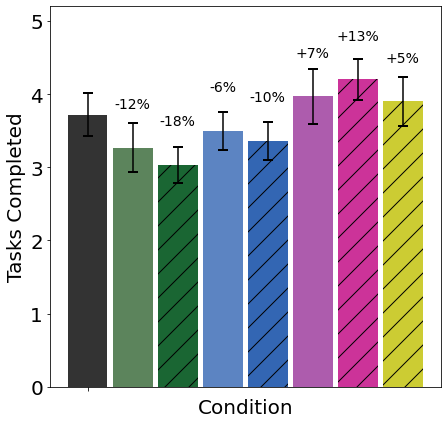

In [9]:

plt.rcParams.update({'font.size': 20})

plt.figure(figsize=(7,7))
x = 0 # the label locations
width = 0.17  # the width of the bars
multiplier = 0


for i in range(len(tasks_completed_df)):
    offset = width * multiplier  
    name = tasks_completed_df.iloc[i].name
    hatch_pattern = '/' if 'chat' in name else ''  # Apply hatch pattern if 'chat' is in the label
    measurement = tasks_completed_df.iloc[i]['mean']
    stderr = tasks_completed_df.iloc[i]['se']
    rects = plt.bar(x + offset , measurement, width - 0.02, label=name, color=colors[multiplier],hatch=hatch_pattern)
    # add stderr
    plt.errorbar(x + offset , measurement, stderr, fmt='none', ecolor='black', capsize=5, capthick=2)
    # get percentage improvement in measurement over No LLM
    improvement = (measurement - tasks_completed_df.loc['No LLM']['mean']) / tasks_completed_df.loc['No LLM']['mean'] * 100
    # add text
    # perform statistcal test

    sign = "+" if improvement >= 0 else "-"
    if name != "No LLM":
        plt.text(x + offset, measurement +0.5, f"{sign}{abs(improvement):.0f}%", ha='center', va='bottom', fontsize=14)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Tasks Completed')
plt.xlabel("Condition")
#plt.legend(loc='bottom')
plt.ylim(0, 5.2)
plt.xticks([0], [''])
plt.yticks([0, 1, 2, 3, 4, 5])


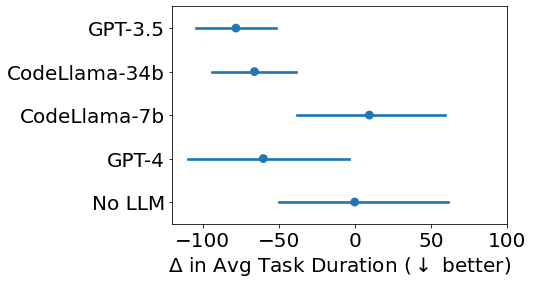

In [10]:
sns.pointplot(x="zscore_mean_task_duration", y="model_size", data=df, linestyles="", errorbar="se")
plt.ylabel("")
plt.xlabel(r'$\Delta$ in Avg Task Duration ($\downarrow$ better)')
#plt.xlim(-1, 1)
plt.xlim(-120,100)
plt.yticks([0,1,2,3,4], ['GPT-3.5', 'CodeLlama-34b', 'CodeLlama-7b', 'GPT-4', 'No LLM'])#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend([],[], frameon=False)
plt.savefig('mean_task_duration.pdf', bbox_inches='tight')

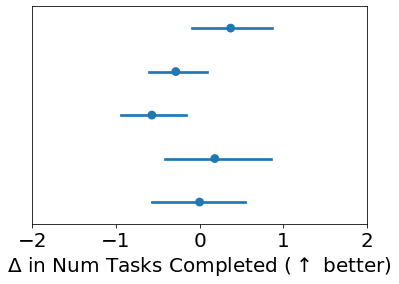

In [11]:
def relabel(value):
    
    if value == 'autocomplete':
        return "Autocomplete"
    elif value == 'chat':
        return "Chat"
    else:
        return "No LLM"

df['interface_clean'] = df['interface'].apply(relabel)


sns.pointplot(x="zscore_n_tasks_completed", y="model_size", data=df, linestyles="")
plt.ylabel("")
plt.xlabel(r'$\Delta$ in Num Tasks Completed ($\uparrow$ better)')
plt.xlim(-2,2)
plt.tick_params(left = False , labelleft = False ) 
plt.savefig('n_tasks_completed.pdf', bbox_inches='tight')

### Time spent based on coding task category

In [12]:
list_task_level_dfs = []

import ast

for row in df.itertuples():
    #temp = ast.literal_eval(row.task_data)
    try:
        temp = row.task_data

        df_temp = pd.DataFrame(temp.values()).assign(model=row.model, interface=row.interface, model_size=row.model_size, 
                                                            task_set=temp.keys())
        list_task_level_dfs.append(df_temp)
    except:
        print(row.task_data["-1"])
        continue
    
    
df_task_level = pd.concat(list_task_level_dfs, ignore_index=True).assign(has_ai = lambda x: x.model != "nomodel").query("time_in_task < 30*60 and name != 'event_scheduler'").reset_index()

In [13]:
task_display_order = ["sum_product", 
                      "t_test", "table_transform_named", "table_transform_unnamed1", "table_transform_unnamed2", 
                      "tokenizer", "calculator", "login_authenticator", "retriever",
                      "even_odd_count", "triple_sum_to_zero", "encode_message", "is_bored", "is_multiply_prime", "count_nums", "order_by_points"]

df_task_level["ordered_name"] = pd.Categorical(df_task_level["name"], categories=task_display_order, ordered=True)
df_task_level["task_category"] = df_task_level["name"].map(dict(zip(task_display_order, ["tutorial"]+["data_manipulation"]*4+["edit_code"]*4+["puzzles"]*7)))

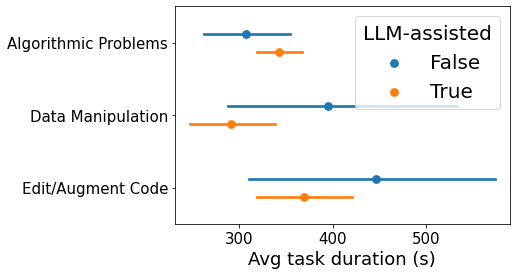

In [14]:
sns.pointplot(y="task_category", x="time_in_task", hue="has_ai", dodge=0.25, data=df_task_level.query("task_category != 'tutorial'"), linestyles="", errorbar="se")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Avg task duration (s)", fontsize=18)
plt.ylabel("")
plt.yticks([0, 1, 2], ['Algorithmic Problems', 'Data Manipulation', 'Edit/Augment Code'])
plt.legend(title='LLM-assisted')

# Section 5.2

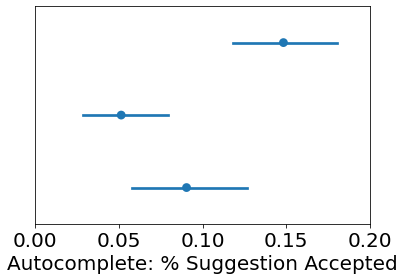

In [15]:
sns.pointplot(x="sugg_accept_rate", y="model_clean_name", data=df.query("interface == 'autocomplete'"), linestyles="", errorbar="se")
plt.ylabel("")
plt.xlabel(r'Autocomplete: % Suggestion Accepted')
plt.xlim(0,0.2)
plt.tick_params(left = False , labelleft = False ) 


([<matplotlib.axis.YTick at 0x7fbe2d95cd90>,
 [Text(0, 0, 'GPT-3.5'),
  Text(0, 1, 'CodeLlama-34b'),
  Text(0, 2, 'CodeLlama-7b'),
  Text(0, 3, 'GPT-4o')])

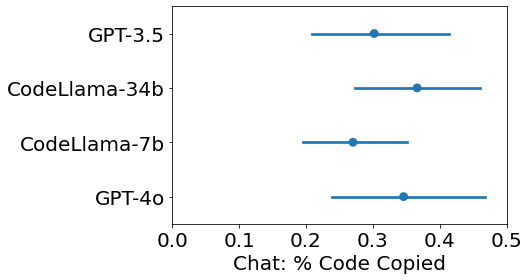

In [16]:
sns.pointplot(x="avg_copy_per_response", y="model_clean_name", data=df.query("interface == 'chat'"), linestyles="", errorbar="se")
plt.ylabel("")
#plt.xlabel("Mean Task Duration")
plt.xlabel(r'Chat: % Code Copied')
plt.xlim(0,0.5)
plt.yticks([0,1,2,3], ['GPT-3.5', 'CodeLlama-34b', 'CodeLlama-7b', 'GPT-4o'])


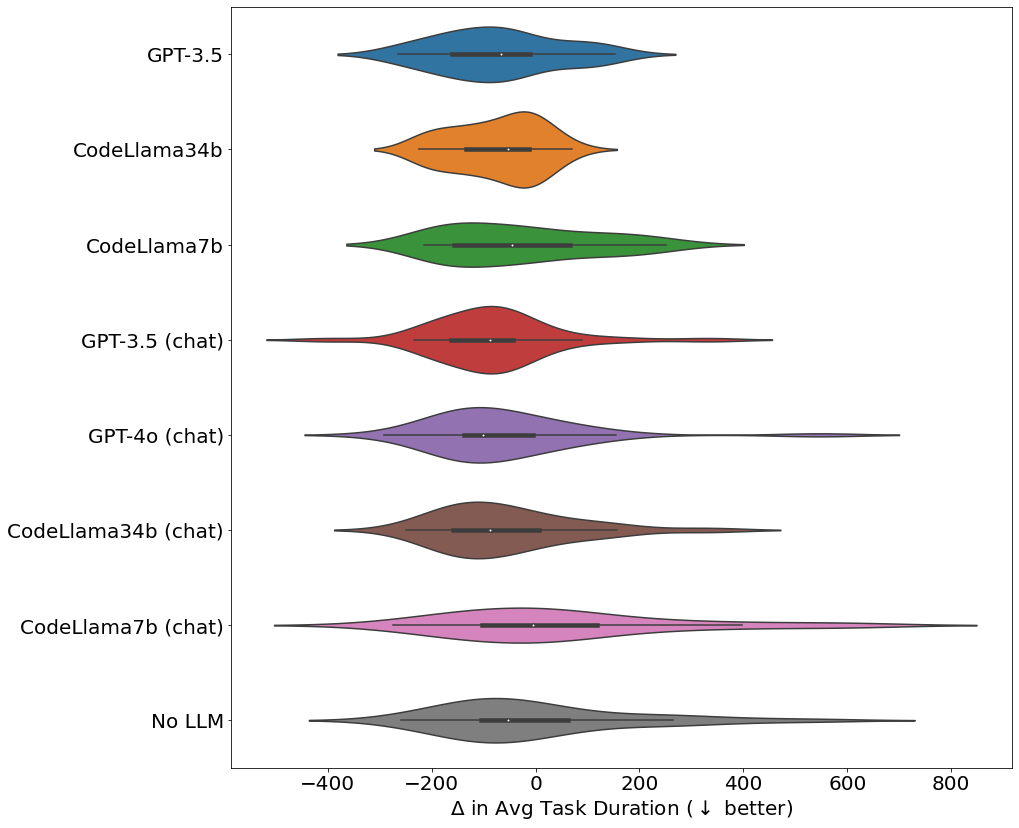

In [17]:
plt.figure(figsize=(14,14))
sns.violinplot(x="zscore_mean_task_duration", y="model_clean_name", data=df, linestyles="", errorbar="se")
plt.ylabel("")
plt.xlabel(r'$\Delta$ in Avg Task Duration ($\downarrow$ better)')
#plt.xlim(-1, 1)
#plt.xlim(-120,100)
#plt.yticks([0,1,2,3], ['GPT-3.5', 'CodeLlama-34b', 'CodeLlama-7b', 'No LLM'])#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend([],[], frameon=False)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


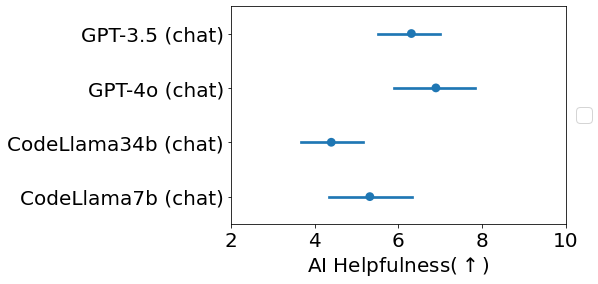

In [18]:
def relabel(value):
    
    if value == 'autocomplete':
        return "Autocomplete"
    elif value == 'chat':
        return "Chat"
    else:
        return "No AI"

df['interface_clean'] = df['interface'].apply(relabel)


sns.pointplot(x="aihelpful", y="model_clean_name", data=df.query("interface == 'chat'"), linestyles="",  errorbar="se")
plt.xlim(2,10)
plt.xlabel(r'AI Helpfulness($\uparrow$)')
plt.ylabel("")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


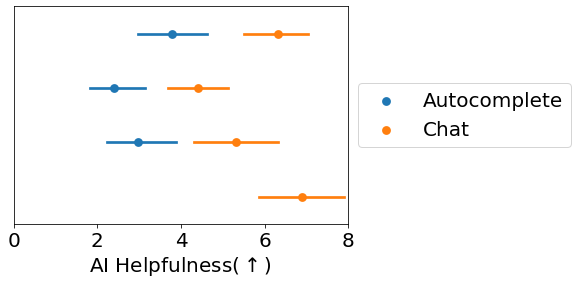

In [19]:
def relabel(value):
    
    if value == 'autocomplete':
        return "Autocomplete"
    elif value == 'chat':
        return "Chat"
    else:
        return "No AI"

df['interface_clean'] = df['interface'].apply(relabel)


sns.pointplot(x="aihelpful", y="model_size", data=df.query("interface != 'nomodel'"), linestyles="", hue="interface_clean", errorbar="se")
plt.ylabel("")
plt.xlim(0,8)
plt.xlabel(r'AI Helpfulness($\uparrow$)')
plt.tick_params(left = False , labelleft = False ) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Stat tests

In [20]:
display(smf.ols(f"zscore_n_tasks_completed ~ C(model_size, Treatment(reference='nomodel'))", data=df).fit().summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     zscore_n_tasks_completed   R-squared:                       0.044
Model:                                  OLS   Adj. R-squared:                  0.028
Method:                       Least Squares   F-statistic:                     2.743
Date:                      Sun, 13 Oct 2024   Prob (F-statistic):             0.0292
Time:                              16:20:29   Log-Likelihood:                -468.73
No. Observations:                       243   AIC:                             947.5
Df Residuals:                           238   BIC:                             964.9
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                -3.851e-16      0.269  -1.43e-15      1.000      -0.531       0.531
C(model_size, Treatment(reference='nomodel'))[T.gpt35]       0.3716      0.339      1.096      0.274      -0.296       1.039
C(model_size, Treatment(reference='nomodel'))[T.gpt4]        0.1821      0.409      0.446      0.656      -0.623       0.987
C(model_size, Treatment(reference='nomodel'))[T.llama34]    -0.2840      0.355     -0.800      0.425      -0.983       0.415
C(model_size, Treatment(reference='nomodel'))[T.llama7]     -0.5698      0.354     -1.611      0.108      -1.266       0.127
==============================================================================
Omnibus:                       13.282   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.391
Skew:                           0.581   Prob(JB):                     0.000750
Kurtosis:                       2.733   Cond. No.                         6.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
display(smf.ols(f"zscore_mean_task_duration ~ C(model_size, Treatment(reference='nomodel'))", data=df).fit().summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     zscore_mean_task_duration   R-squared:                       0.059
Model:                                   OLS   Adj. R-squared:                  0.043
Method:                        Least Squares   F-statistic:                     3.709
Date:                       Sun, 13 Oct 2024   Prob (F-statistic):            0.00599
Time:                               16:20:29   Log-Likelihood:                -1547.5
No. Observations:                        241   AIC:                             3105.
Df Residuals:                            236   BIC:                             3123.
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                 9.291e-14     24.388   3.81e-15      1.000     -48.045      48.045
C(model_size, Treatment(reference='nomodel'))[T.gpt35]     -78.0299     30.530     -2.556      0.011    -138.176     -17.883
C(model_size, Treatment(reference='nomodel'))[T.gpt4]      -60.0613     36.717     -1.636      0.103    -132.396      12.273
C(model_size, Treatment(reference='nomodel'))[T.llama34]   -65.8670     31.956     -2.061      0.040    -128.823      -2.911
C(model_size, Treatment(reference='nomodel'))[T.llama7]      9.6509     31.956      0.302      0.763     -53.305      72.607
==============================================================================
Omnibus:                       66.054   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.967
Skew:                           1.292   Prob(JB):                     2.72e-33
Kurtosis:                       5.873   Cond. No.                         6.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
display(smf.ols(f"sugg_accept_rate ~ C(model, Treatment(reference='autocomplete_llama34'))", data=df.query("interface=='autocomplete'")).fit().summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       sugg_accept_rate   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     10.03
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           0.000130
Time:                        16:20:29   Log-Likelihood:                 89.569
No. Observations:                  83   AIC:                            -173.1
Df Residuals:                      80   BIC:                            -165.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================================================================================
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                        0.0514      0.016      3.187      0.002       0.019       0.083
C(model, Treatment(reference='autocomplete_llama34'))[T.autocomplete_gpt35]      0.0969      0.022      4.428      0.000       0.053       0.140
C(model, Treatment(reference='autocomplete_llama34'))[T.autocomplete_llama7]     0.0390      0.024      1.661      0.101      -0.008       0.086
==============================================================================
Omnibus:                       14.435   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.199
Skew:                           0.923   Prob(JB):                     0.000304
Kurtosis:                       4.131   Cond. No.                         3.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
display(smf.ols(f"avg_copy_per_response ~ C(model, Treatment(reference='chat_llama7'))", data=df.query("interface=='chat'")).fit().summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     avg_copy_per_response   R-squared:                       0.020
Model:                               OLS   Adj. R-squared:                 -0.008
Method:                    Least Squares   F-statistic:                    0.7120
Date:                   Sun, 13 Oct 2024   Prob (F-statistic):              0.547
Time:                           16:20:29   Log-Likelihood:                -5.4535
No. Observations:                    107   AIC:                             18.91
Df Residuals:                        103   BIC:                             29.60
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Intercept                                                        0.3458      0.053      6.527      0.000       0.241       0.451
C(model, Treatment(reference='chat_llama7'))[T.chat_gpt35]      -0.0440      0.071     -0.623      0.535      -0.184       0.096
C(model, Treatment(reference='chat_llama7'))[T.chat_gpt4]        0.0201      0.072      0.281      0.779      -0.122       0.162
C(model, Treatment(reference='chat_llama7'))[T.chat_llama34]    -0.0756      0.076     -0.998      0.321      -0.226       0.075
==============================================================================
Omnibus:                        8.521   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.836
Skew:                           0.704   Prob(JB):                       0.0121
Kurtosis:                       3.019   Cond. No.                         5.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
display(smf.ols(f"aihelpful ~ C(interface, Treatment(reference='autocomplete'))", data=df.query("interface!='nomodel'")).fit().summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              aihelpful   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           3.19e-13
Time:                        16:20:29   Log-Likelihood:                -473.52
No. Observations:                 204   AIC:                             951.0
Df Residuals:                     202   BIC:                             957.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                     3.0814      0.267     11.535      0.000       2.555       3.608
C(interface, Treatment(reference='autocomplete'))[T.chat]     2.7406      0.351      7.803      0.000       2.048       3.433
==============================================================================
Omnibus:                        7.268   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.284
Skew:                           0.428   Prob(JB):                       0.0262
Kurtosis:                       2.646   Cond. No.                         2.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
pvals = []
fit = smf.ols(f"zscore_n_tasks_completed ~ C(model_size, Treatment(reference='nomodel'))", data=df).fit()
pvals.append(fit.pvalues[1])
pvals.append(fit.pvalues[2])
pvals.append(fit.pvalues[3])
fit = smf.ols(f"zscore_mean_task_duration ~ C(model_size, Treatment(reference='nomodel'))", data=df).fit()
pvals.append(fit.pvalues[1]) # significant
pvals.append(fit.pvalues[2])
pvals.append(fit.pvalues[3])
fit = smf.ols(f"sugg_accept_rate ~ C(model, Treatment(reference='autocomplete_llama34'))", data=df.query("interface=='autocomplete'")).fit()
pvals.append(fit.pvalues[1])#significant
pvals.append(fit.pvalues[2]) 
fit = smf.ols(f"avg_copy_per_response ~ C(model, Treatment(reference='chat_llama7'))", data=df.query("interface=='chat'")).fit()
pvals.append(fit.pvalues[1])
pvals.append(fit.pvalues[2])
fit = smf.ols(f"aihelpful ~ C(interface, Treatment(reference='autocomplete'))", data=df.query("interface!='nomodel'")).fit()
pvals.append(fit.pvalues[1]) # significant


In [26]:
import statsmodels

statsmodels.stats.multitest.multipletests(pvals, method="fdr_bh")

(array([False, False, False,  True, False, False,  True, False, False,
        False,  True]),
 array([4.30554963e-01, 7.21993927e-01, 5.83733393e-01, 4.11454218e-02,
        1.89227455e-01, 1.11051861e-01, 1.64042611e-04, 1.89227455e-01,
        6.53487955e-01, 7.79005624e-01, 3.51194213e-12]),
 0.004652171732197341,
 0.004545454545454546)